<a href="https://colab.research.google.com/github/Hujaifa98/AIProjects/blob/main/Kaggle_House_Price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from __future__ import print_function
import tensorflow as tf
import numpy as np
import pandas as pd
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt
import seaborn as sns
from keras import backend as K
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.preprocessing import StandardScaler # Used for scaling of data
from sklearn.model_selection import train_test_split
from tensorflow.keras import regularizers

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
Using TensorFlow backend.


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving sample_submission.csv to sample_submission (3).csv
Saving test.csv to test (3).csv
Saving train.csv to train (2).csv


In [ ]:
raw_train = pd.read_csv('train.csv')
raw_test = pd.read_csv('test (3).csv')
submission_sample = pd.read_csv('sample_submission.csv')

In [ ]:
raw_test

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,Twnhs,2Story,4,7,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Unf,0.0,Unf,0.0,546.0,546.0,GasA,Gd,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,5,Typ,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,TwnhsE,2Story,4,5,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,252.0,Unf,0.0,294.0,546.0,GasA,TA,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,6,Typ,0,NaN,CarPort,1970.0,Unf,1.0,286.0,TA,TA,Y,0,24,0,0,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1Story,5,7,1960,1996,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,ALQ,1224.0,Unf,0.0,0.0,1224.0,GasA,Ex,Y,SBrkr,1224,0,0,1224,1.0,0.0,1,0,4,1,TA,7,Typ,1,TA,Detchd,1960.0,Unf,2.0,576.0,TA,TA,Y,474,0,0,0,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,SFoyer,5,5,1992,1992,Gable,Comp

In [ ]:
a = pd.get_dummies(raw_train)
a

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,MSZoning_C (all),MSZoning_FV,...,GarageFinish_Unf,GarageQual_Ex,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Ex,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,PavedDrive_N,PavedDrive_P,PavedDrive_Y,PoolQC_Ex,PoolQC_Fa,PoolQC_Gd,Fence_GdPrv,Fence_GdWo,Fence_MnPrv,Fence_MnWw,MiscFeature_Gar2,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,208500,0,0,...,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,181500,0,0,...,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,223500,0,0,...,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006,140000,0,0,...,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008,250000,0,0,...,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,62.0,7917,6,5,1999,2000,0.0,0,0,953,953,953,694,0,1647,0,0,2,1,3,1,7,1,1999.0,2,460,0,40,0,0,0,0,0,8,2007,175000,0,0,...,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1456,1457,20,85.0,13175,6,6,1978,1988,119.0,790,163,589,1542,2073,0,0,2073,1,0,2,0,3,1,7,2,1978.0,2,500,349,0,0,0,0,0,0,2,2010,210000,0,0,...,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1457,1458,70,66.0,9042,7,9,1941,2006,0.0,275,0,877,1152,1188,1152,0,2340,0,0,2,0,4,1,9,2,1941.0,1,252,0,60,0,0,0,0,2500,5,2010,266500,0,0,...,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1458,1459,20,68.0,9717,5,6,1950,1996,0.0,49,1029,0,1078,1078,0,0,1078,1,0,1,0,2,1,5,0,1950.0,1,240,366,0,112,0,0,0,0,4,2010,142125,0,0,...,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0


In [ ]:
proc_train = a.corr()
proc_train

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,MSZoning_C (all),MSZoning_FV,...,GarageFinish_Unf,GarageQual_Ex,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Ex,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,PavedDrive_N,PavedDrive_P,PavedDrive_Y,PoolQC_Ex,PoolQC_Fa,PoolQC_Gd,Fence_GdPrv,Fence_GdWo,Fence_MnPrv,Fence_MnWw,MiscFeature_Gar2,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
Id,1.000000,0.011156,-0.010601,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.050298,-0.005024,-0.005968,-0.007940,-0.015415,0.010496,0.005590,-0.044230,0.008273,0.002289,-0.020155,0.005587,0.006784,0.037719,0.002951,0.027239,-0.019772,0.000072,0.016570,0.017634,-0.029643,-0.000477,0.002889,-0.046635,0.001330,0.057044,-0.006242,0.021172,0.000712,-0.021917,-0.024689,-0.012020,...,-0.007513,-0.035009,0.009797,0.024080,-0.036982,0.007459,-0.018937,0.024452,0.009042,-0.009775,0.000068,-0.012730,0.022269,-0.000355,-0.003515,0.032383,0.061099,0.010650,0.009162,-0.021589,0.002678,0.005141,0.005229,-0.048244,0.040780,-0.005157,0.021204,-0.016301,-0.004412,-0.058765,-0.020738,-0.018998,0.038920,0.026133,0.007009,-0.034852,-0.009018,0.004865,0.015881,-0.020738
MSSubClass,0.011156,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,-0.065649,-0.140759,-0.238518,-0.251758,0.307886,0.046474,0.074853,0.003491,-0.002333,0.131608,0.177354,-0.023438,0.281721,0.040380,-0.045569,0.085072,-0.040110,-0.098672,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284,-0.001762,0.171336,...,-0.008807,-0.016344,-0.026894,0.057914,0.033734,-0.069950,-0.027938,0.001969,-0.000429,0.026197,-0.071293,0.069317,-0.025338,-0.047611,0.009287,-0.014800,0.017637,0.001074,-0.078311,-0.076225,-0.032006,-0.001662,0.050890,-0.054229,0.001921,-0.034162,0.028636,0.028994,0.085451,-0.001244,0.014005,-0.045156,-0.014555,0.026359,0.005003,0.016241,0.030002,0.000983,0.024359,-0.051068
LotFrontage,-0.010601,-0.386347,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,0.233633,0.049900,0.132644,0.392075,0.457181,0.080177,0.038469,0.402797,0.100949,-0.007234,0.198769,0.053532,0.263170,-0.006069,0.352096,0.266639,0.070250,0.285691,0.344997,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450,0.351799,-0.001321,-0.097092,...,-0.207223,0.014327,-0.057423,-0.012440,-0.017969,0.115974,0.000757,-0.044430,-0.012386,-0.017660,0.112617,-0.093285,-0.013754,0.089393,0.163118,0.015058,0.209386,0.030575,0.028362,0.007293,-0.002453,NaN,-0.008497,0.009093,0.011833,-0.016315,-0.006072,-0.030369,0.035253,0.014169,-0.051807,0.128311,-0.023466,-0.094298,-0.023965,-0.037030,-0.019817,0.016684,-0.076258,0.126571
LotArea,-0.033226,-0.139781,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,0.111170,-0.002618,0.260833,0.299475,0.050986,0.004779,0.263116,0.158155,0.048046,0.126031,0.014259,0.119690,-0.017784,0.190015,0.271364,-0.024947,0.154871,0.180403,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843,-0.008452,-0.083895,...,-0.068099,0.011217,-0.025147,0.006114,-0.004317,0.067781,-0.009342,-0.024487,-0.006288,-0.009815,0.076907,-0.019325,0.012568,0.010431,0.037135,0.010762,0.093845,0.000071,-0.017339,-0.045656,-0.011054,0.019726,-0.006105,0.108728,0.016203,-0.016019,-0.007818,-0.002872,-0.006018,0.001076

In [ ]:
proc_train.columns[proc_train['SalePrice'] <= -0.4]

Index(['ExterQual_TA', 'BsmtQual_TA', 'KitchenQual_TA', 'GarageFinish_Unf'], dtype='object')

In [ ]:
columns = ['OverallQual', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'TotalBsmtSF',
       '1stFlrSF', 'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 
       'Neighborhood_NridgHt', 'ExterQual_Ex', 'ExterQual_Gd',
       'Foundation_PConc', 'BsmtQual_Ex', 'BsmtFinType1_GLQ', 'HeatingQC_Ex',
       'KitchenQual_Ex', 'GarageFinish_Fin' , 'ExterQual_TA', 'BsmtQual_TA', 
       'KitchenQual_TA', 'GarageFinish_Unf' , 'SalePrice']
proc_train = a[columns]
proc_train

,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,Neighborhood_NridgHt,ExterQual_Ex,ExterQual_Gd,Foundation_PConc,BsmtQual_Ex,BsmtFinType1_GLQ,HeatingQC_Ex,KitchenQual_Ex,GarageFinish_Fin,ExterQual_TA,BsmtQual_TA,KitchenQual_TA,GarageFinish_Unf,SalePrice
0,7,2003,2003,196.0,856,856,1710,2,8,0,2003.0,2,548,0,0,1,1,0,1,1,0,0,0,0,0,0,208500
1,6,1976,1976,0.0,1262,1262,1262,2,6,1,1976.0,2,460,0,0,0,0,0,0,1,0,0,1,0,1,0,181500
2,7,2001,2002,162.0,920,920,1786,2,6,1,2001.0,2,608,0,0,1,1,0,1,1,0,0,0,0,0,0,223500
3,7,1915,1970,0.0,756,961,1717,1,7,1,1998.0,3,642,0,0,0,0,0,0,0,0,0,1,1,0,1,140000
4,8,2000,2000,350.0,1145,1145,2198,2,9,1,2000.0,3,836,0,0,1,1,0,1,1,0,0,0,0,0,0,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,6,1999,2000,0.0,953,953,1647,2,7,1,1999.0,2,460,0,0,0,1,0,0,1,0,0,1,0,1,0,175000
1456,6,1978,1988,119.0,1542,2073,2073,2,7,2,1978.0,2,500,0,0,0,0,0,0,0,0,0,1,0,1,1,210000
1457,7,1941,2006,0.0,1152,1188,2340,2,9,2,1941.0,1,252,0,1,0,0,0,1,1,0,0,0,1,0,0,266500
1458,5,1950,1996,0.0,1078,1078,1078,1,5,0,1950.0,1,240,0,0,0,0,0,1,0,0,0,1,1,0,1,142125


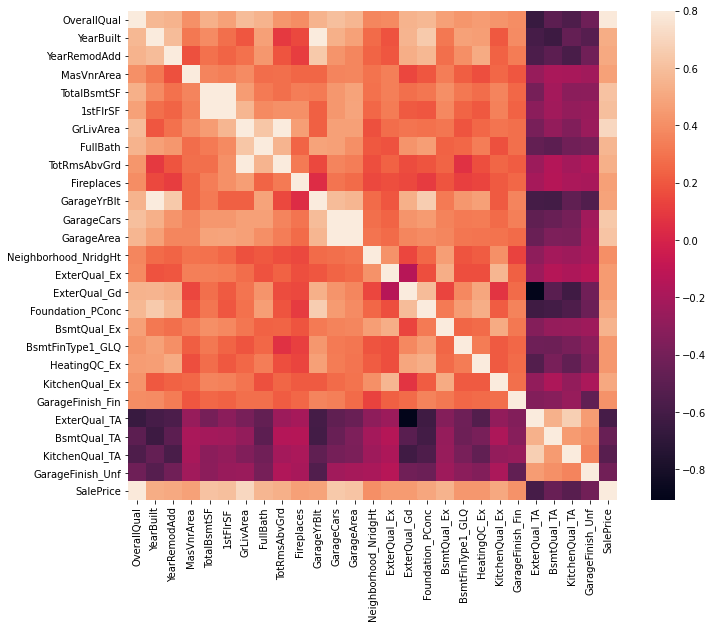

In [ ]:
corrmat = proc_train.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True)

In [ ]:
proc_train.drop(['GarageYrBlt' , '1stFlrSF' , 'TotRmsAbvGrd' , 'GarageCars'] , axis=1 , inplace=True)
proc_train.shape

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


(1460, 23)

In [ ]:
columns = proc_train.columns.to_list()
proc_train.isnull().any()
print(columns)

['OverallQual', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'TotalBsmtSF', 'GrLivArea', 'FullBath', 'Fireplaces', 'GarageArea', 'Neighborhood_NridgHt', 'ExterQual_Ex', 'ExterQual_Gd', 'Foundation_PConc', 'BsmtQual_Ex', 'BsmtFinType1_GLQ', 'HeatingQC_Ex', 'KitchenQual_Ex', 'GarageFinish_Fin', 'ExterQual_TA', 'BsmtQual_TA', 'KitchenQual_TA', 'GarageFinish_Unf', 'SalePrice']


In [ ]:
proc_train.loc[proc_train['MasVnrArea'].isnull()]

,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,TotalBsmtSF,GrLivArea,FullBath,Fireplaces,GarageArea,Neighborhood_NridgHt,ExterQual_Ex,ExterQual_Gd,Foundation_PConc,BsmtQual_Ex,BsmtFinType1_GLQ,HeatingQC_Ex,KitchenQual_Ex,GarageFinish_Fin,ExterQual_TA,BsmtQual_TA,KitchenQual_TA,GarageFinish_Unf,SalePrice
234,6,2002,2002,NaN,860,1960,2,2,440,0,0,1,1,0,1,1,0,1,0,0,0,0,216500
529,6,1957,1975,NaN,2035,2515,3,2,484,0,0,1,1,0,0,0,0,0,0,1,1,0,200624
650,7,2007,2007,NaN,813,1665,2,0,562,0,0,1,1,0,0,1,0,0,0,0,0,0,205950
936,7,2003,2003,NaN,1176,1200,2,0,555,0,0,1,1,0,1,1,0,0,0,0,0,0,184900
973,7,2007,2008,NaN,1428,1428,2,0,480,0,0,1,1,0,0,1,0,1,0,0,0,0,182000
977,7,2006,2007,NaN,1241,1241,1,0,569,0,0,1,1,0,1,1,0,1,0,0,0,0,199900
1243,10,2006,2006,NaN,2076,2076,2,1,850,1,1,0,1,1,1,1,1,1,0,0,0,0,465000
1278,8,2002,2002,NaN,1128,2031,2,1,577,0,0,1,1,0,1,1,0,0,0,0,0,0,237000


In [ ]:
proc_train['MasVnrArea'].fillna(proc_train['MasVnrArea'].mean() , inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [ ]:
X = proc_train.drop('SalePrice' , axis=1)
Y = proc_train['SalePrice']

In [ ]:
scale = StandardScaler()
X = scale.fit_transform(X)
pd.DataFrame(X)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21
0,0.651479,1.050994,0.878668,0.511418,-0.459303,0.370333,0.789741,-0.951226,0.351000,-0.235958,-0.192177,1.411313,1.120968,-0.300609,1.578868,0.985043,-0.271163,-0.563640,-1.278819,-0.894565,-1.006873,-0.841191
1,-0.071836,0.156734,-0.429577,-0.574410,0.466465,-0.482512,0.789741,0.600495,-0.060731,-0.235958,-0.192177,-0.708560,-0.892086,-0.300609,-0.633365,0.985043,-0.271163,-0.563640,0.781971,-0.894565,0.993174,-0.841191
2,0.651479,0.984752,0.830215,0.323060,-0.313369,0.515013,0.789741,0.600495,0.631726,-0.235958,-0.192177,1.411313,1.120968,-0.300609,1.578868,0.985043,-0.271163,-0.563640,-1.278819,-0.894565,-1.006873,-0.841191
3,0.651479,-1.863632,-0.720298,-0.574410,-0.687324,0.383659,-1.026041,0.600495,0.790804,-0.235958,-0.192177,-0.708560,-0.892086,-0.300609,-0.633365,-1.015184,-0.271163,-0.563640,0.781971,1.117862,-1.006873,1.188791
4,1.374795,0.951632,0.733308,1.364570,0.199680,1.299326,0.789741,0.600495,1.698485,-0.235958,-0.192177,1.411313,1.120968,-0.300609,1.578868,0.985043,-0.271163,-0.563640,-1.278819,-0.894565,-1.006873,-0.841191
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,-0.071836,0.918511,0.733308,-0.574410,-0.238122,0.250402,0.789741,0.600495,-0.060731,-0.235958,-0.192177,-0.708560,1.120968,-0.300609,-0.633365,0.985043,-0.271163,-0.563640,0.781971,-0.894565,0.993174,-0.841191
1456,-0.071836,0.222975,0.151865,0.084843,1.104925,1.061367,0.789741,2.152216,0.126420,-0.235958,-0.192177,-0.708560,-0.892086,-0.300609,-0.633365,-1.015184,-0.271163,-0.563640,0.781971,-0.894565,0.993174,1.188791
1457,0.651479,-1.002492,1.024029,-0.574410,0.215641,1.569647,0.789741,2.152216,-1.033914,-0.235958,5.203549,-0.708560,-0.892086,-0.300609,1.578868,0.985043,-0.271163,-0.563640,-1.278819,1.117862,-1.006873,-0.841191
1458,-0.795151,-0.704406,0.539493,-0.574410,0.046905,-0.832788,-1.026041,-0.951226,-1.090059,-0.235958,-0.192177,-0.708560,-0.892086,-0.300609,1.578868,-1.015184,-0.271163,-0.563640,0.781971,1.117862,-1.006873,1.188791


In [ ]:
#Y = Y.to_numpy()
x_train , x_test , y_train , y_test = train_test_split(X , Y , test_size = 0.25)

In [ ]:
i = Input(shape=x_train[0].shape)
#x = Dense(32 , activation='relu' , activity_regularizer= regularizers.l2(0.01))(i)
#x = Dropout(0.2)(x)
x = Dense(64 , activation='relu' , activity_regularizer= regularizers.l2(0.01))(i)
x = Dropout(0.2)(x)
x = Dense(128 , activation='relu' , activity_regularizer= regularizers.l2(0.01))(x)
x = Dropout(0.2)(x)
x = Dense(256 , activation='relu' , activity_regularizer= regularizers.l2(0.01))(x)
x = Dropout(0.2)(x)
x = Dense(512 , activation='relu' , activity_regularizer= regularizers.l2(0.01))(x)
x = Dropout(0.2)(x)
#x = Dense(512 , activation='relu' , activity_regularizer= regularizers.l2(0.01))(x)
#x = Dropout(0.25)(x)
#x = Dense(1024 , activation='relu' , activity_regularizer= regularizers.l2(0.1))(x)
#x = Dropout(0.2)(x)
#x = Dense(2048 , activation='relu' , activity_regularizer= regularizers.l2(0.1))(x)
#x = Dropout(0.2)(x)
x = Dense(1)(x)
model = Model(i , x)

In [ ]:
model.compile(optimizer ='adam', loss = 'mean_squared_error') 

In [ ]:
r = model.fit(x_train , y_train , validation_data=(x_test , y_test) , epochs=300 , batch_size=32)

Epoch 1/300
35/35 [==============================] - 0s 8ms/step - loss: 39145758720.0000 - val_loss: 38253588480.0000
Epoch 2/300
35/35 [==============================] - 0s 5ms/step - loss: 35548409856.0000 - val_loss: 25116239872.0000
Epoch 3/300
35/35 [==============================] - 0s 5ms/step - loss: 11964695552.0000 - val_loss: 3392971520.0000
Epoch 4/300
35/35 [==============================] - 0s 5ms/step - loss: 4314840064.0000 - val_loss: 2551878912.0000
Epoch 5/300
35/35 [==============================] - 0s 5ms/step - loss: 3326943488.0000 - val_loss: 1921894400.0000
Epoch 6/300
35/35 [==============================] - 0s 5ms/step - loss: 3046722560.0000 - val_loss: 1574089600.0000
Epoch 7/300
35/35 [==============================] - 0s 5ms/step - loss: 2894903808.0000 - val_loss: 1380555136.0000
Epoch 8/300
35/35 [==============================] - 0s 5ms/step - loss: 2447444992.0000 - val_loss: 1221257600.0000
Epoch 9/300
35/35 [==============================] - 0s 5ms

In [ ]:
proc_train.columns

Index(['OverallQual', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'TotalBsmtSF',
       'GrLivArea', 'FullBath', 'Fireplaces', 'GarageArea',
       'Neighborhood_NridgHt', 'ExterQual_Ex', 'ExterQual_Gd',
       'Foundation_PConc', 'BsmtQual_Ex', 'BsmtFinType1_GLQ', 'HeatingQC_Ex',
       'KitchenQual_Ex', 'GarageFinish_Fin', 'ExterQual_TA', 'BsmtQual_TA',
       'KitchenQual_TA', 'GarageFinish_Unf', 'SalePrice'],
      dtype='object')

In [ ]:
sub_train = pd.get_dummies(raw_test)
sub_train = sub_train[['OverallQual', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'TotalBsmtSF',
       'GrLivArea', 'FullBath', 'Fireplaces', 'GarageArea',
       'Neighborhood_NridgHt', 'ExterQual_Ex', 'ExterQual_Gd',
       'Foundation_PConc', 'BsmtQual_Ex', 'BsmtFinType1_GLQ', 'HeatingQC_Ex',
       'KitchenQual_Ex', 'GarageFinish_Fin', 'ExterQual_TA', 'BsmtQual_TA',
       'KitchenQual_TA', 'GarageFinish_Unf']]

In [ ]:
sub_train.fillna(sub_train.mean() , inplace=True)

In [ ]:
scale = StandardScaler()
sub_train = scale.fit_transform(sub_train)

In [ ]:
p = model.predict(sub_train)
p

array([[126532.125],
       [138516.6  ],
       [174346.44 ],
       ...,
       [155189.8  ],
       [126379.2  ],
       [220398.17 ]], dtype=float32)

In [ ]:
submission = pd.DataFrame()
submission['Id'] = raw_test['Id']
submission['SalePrice'] = p
submission

,Id,SalePrice
0,1461,126532.125000
1,1462,138516.593750
2,1463,174346.437500
3,1464,190194.718750
4,1465,185485.687500
...,...,...
1454,2915,102988.046875
1455,2916,104404.421875
1456,2917,155189.796875
1457,2918,126379.203125


In [ ]:
submission.to_csv('house_price_submission_new.csv', index=False)
from google.colab import drive
drive.mount('drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at drive


In [ ]:
!cp house_price_submission_new.csv "drive/My Drive/"